# Re-entrenamos el modelo medium de YoloV5 con el dataset entero de Kaggle

Añadimos acceso a la carpeta de los dataset del Drive del grupo de proyectos

Importante estar ya logeados en la cuenta del grupo, da problemas si estamos en nuestra cuenta personal y queremos montar el drive de la cuenta del grupo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las bibliotecas necesarias

In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
# Para windows con la CPU:
!pip3 install torch torchvision torchaudio 

# Para Windows con CUDA:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

# Para windows con la CPU:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# Para Windows con CUDA:
# !pip3 install torch torchvision torchaudio

# Es posible que la mayoría de dependencias ya esten instaladas ^^

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!git clone https://github.com/ultralytics/yolov5
# Se deberia haber creado una carpeta en nuestro area de trabajo
# Si ya lo teniamos saldra el siguiente error =>fatal: destination path 'yolov5' already exists and is not an empty directory.

Cloning into 'yolov5'...
remote: Enumerating objects: 15577, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 15577 (delta 79), reused 107 (delta 53), pack-reused 15393
Receiving objects: 100% (15577/15577), 14.58 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (10608/10608), done.


In [6]:
%cd /content/yolov5
!git pull
%cd ../

/content/yolov5
Already up to date.
/content


In [7]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 #Para abrir webcam
# cv2.imshow() is disabled in Colab, because it causes Jupyter sessionsto crash, consider using cv2_imshow 
from google.colab.patches import cv2_imshow 
import sys # to access the system

# Esta línea de código establece una variable de entorno llamada KMP_DUPLICATE_LIB_OK con el valor "True", lo que significa que permite la carga de bibliotecas duplicadas en el entorno de Python. Esto es útil para algunas bibliotecas de Machine Learning que usan OpenMP para acelerar el cómputo.
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

***
En la siguiente celda se escogen 100 imagenes para hacer el re-entreno.
 
Además esas imagenes se suben a unas carpetas que creamos en el directorio base de colabs.
***

In [9]:
import os
import random
import shutil

# Creamos los directorios necesarios
os.makedirs('/content/data/train/images', exist_ok=True)
os.makedirs('/content/data/train/labels', exist_ok=True)
os.makedirs('/content/data/val/images', exist_ok=True)
os.makedirs('/content/data/val/labels', exist_ok=True)
os.makedirs('/content/data/test/images', exist_ok=True)
os.makedirs('/content/data/test/labels', exist_ok=True)

dest_train_Image = "/content/data/train/images/"
dest_train_Label = "/content/data/train/labels/"
dest_val_Image = "/content/data/val/images/"
dest_val_Label = "/content/data/val/labels/"
dest_test_Image = "/content/data/test/images/"
dest_test_Label = "/content/data/test/labels/"

with os.scandir('/content/drive/MyDrive/IA/Datasets/YoloV5_Train_Val_Test/train/images') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_train_Image)

with os.scandir('/content/drive/MyDrive/IA/Datasets/YoloV5_Train_Val_Test/train/labels') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_train_Label)

with os.scandir('/content/drive/MyDrive/IA/Datasets/YoloV5_Train_Val_Test/val/images') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Image)

with os.scandir('/content/drive/MyDrive/IA/Datasets/YoloV5_Train_Val_Test/val/labels') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Label)


with os.scandir('/content/drive/MyDrive/IA/Datasets/Señales_Plastico_Augmentation/train/images') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Image)

with os.scandir('/content/drive/MyDrive/IA/Datasets/Señales_Plastico_Augmentation/train/labels') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Label)

with os.scandir('/content/drive/MyDrive/IA/Datasets/Señales_Plastico_Augmentation/val/images') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Image)

with os.scandir('/content/drive/MyDrive/IA/Datasets/Señales_Plastico_Augmentation/val/labels') as entries:
  for entry in entries:
    shutil.copy2(entry.path, dest_val_Label)

***
**`Entrenar un modelo desde cero`**
***

Ahora tenemos que crear el archivo dataset.yaml, que contiene las categorias de nuestros pesos y las rutas de nuestras imagenes de entrenamiento, test y validación.

In [10]:
f= open("yolov5/data/dataset_Kaggle.yaml","w+")

f.write("path: ../data \ntrain: train/images/ \nval: val/images \n\nnc: 4 \n\nnames: ['prohibitory', 'danger', 'mandatory', 'other']")

f.close()

In [11]:
# shutil.copy2("/content/yolov5/requirements.txt", "/content/requirements.txt")
# !cd yolov5 && python train.py --img 640 --batch 8 --epochs 600 --data dataset_Kaggle.yaml --weights yolov5s.pt --project ../drive/MyDrive/IA/Pesos_yoloV5/experimentos-marko --save-period 20 

In [12]:
!cd yolov5 && python train.py --resume ../drive/MyDrive/IA/Pesos_yoloV5/experimentos-marko/exp/weights/last.pt

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=../drive/MyDrive/IA/Pesos_yoloV5/experimentos-marko/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-150-gbe61a64 Python-3.9.16 torch-2.0.0+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls

***
**`Cargamos nuestro modelo`**
***

In [ ]:
modelo = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/IA/Pesos_yoloV5/experimentos-marko/exp/weights/best.pt', force_reload=True)

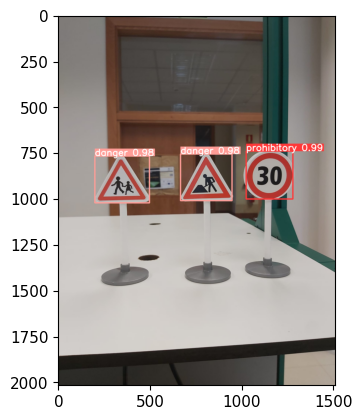

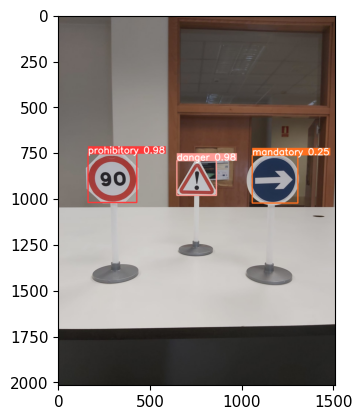

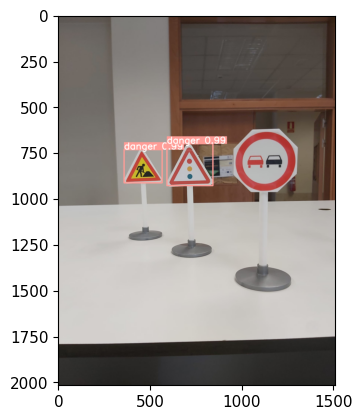

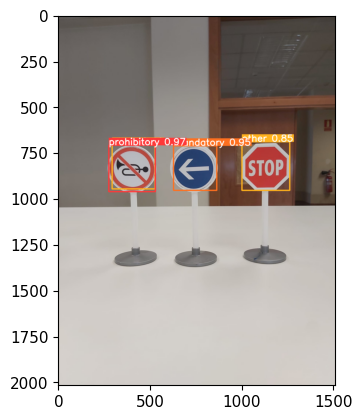

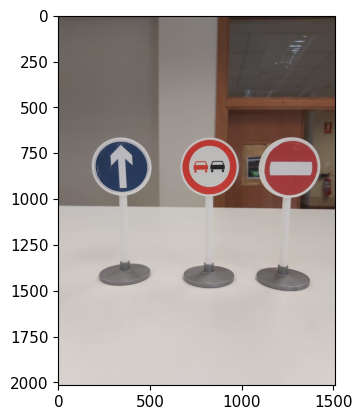

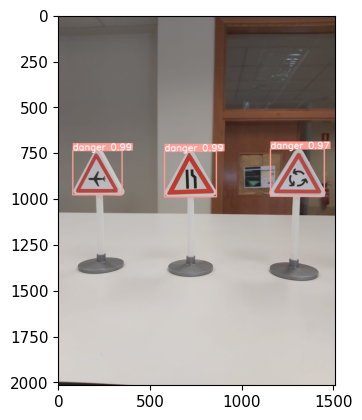

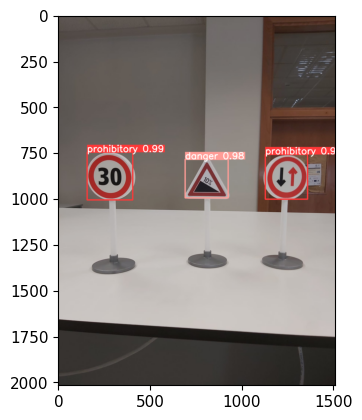

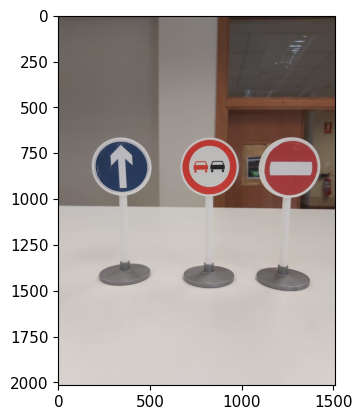

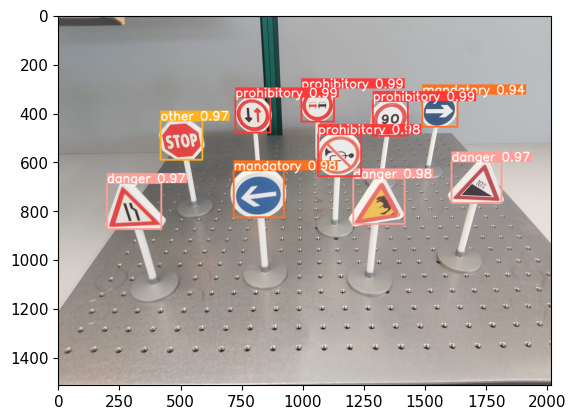

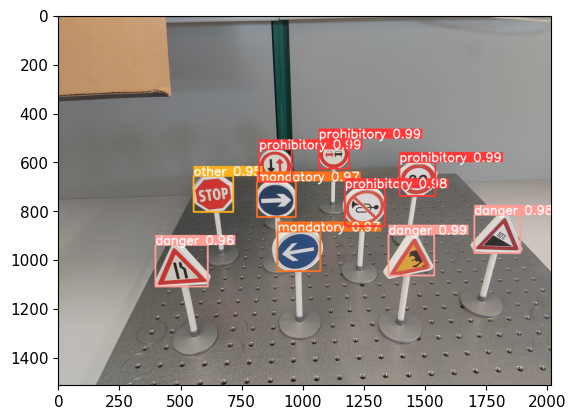

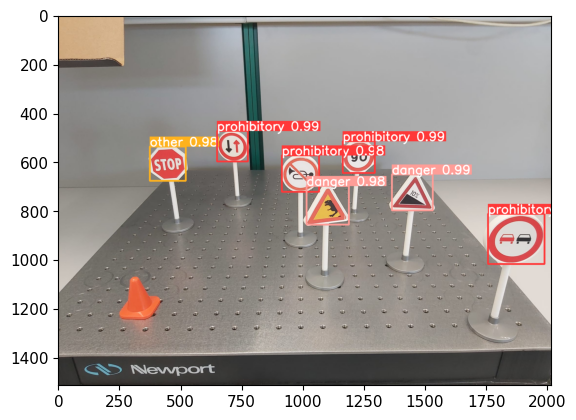

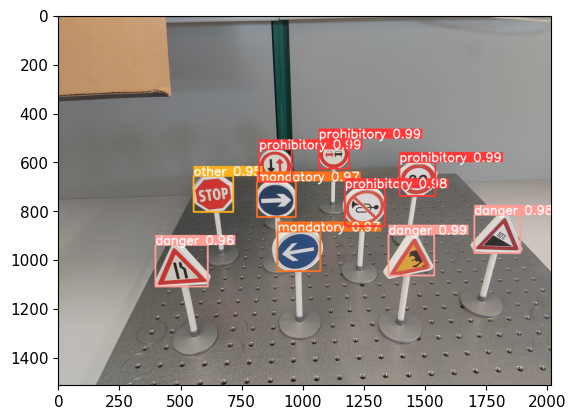

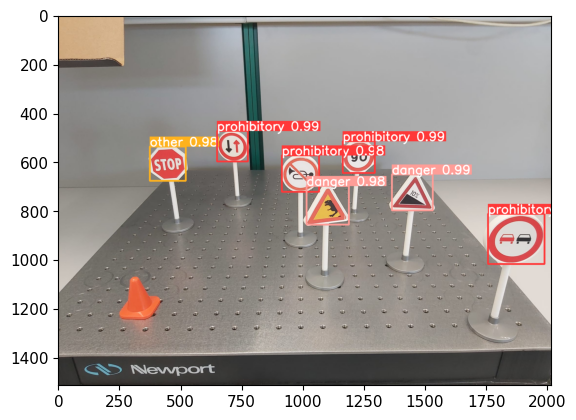

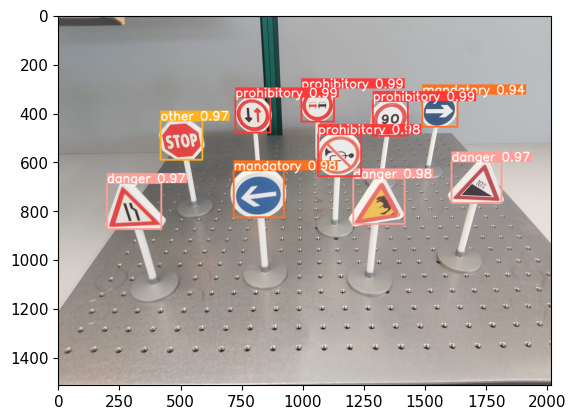

In [15]:
%matplotlib inline
import os

# with os.scandir('/content/drive/MyDrive/IA/Datasets/YoloV5_Train_Val_Test/test/images/') as entries:
#   for src_img in entries:
#     # print(src_img.path)
#     results = modelo(src_img.path)
#     plt.imshow(np.squeeze(results.render()))
#     plt.show()

with os.scandir('/content/drive/MyDrive/IA/Datasets/DataSetVicky/variasSenales/') as entries:
  for src_img in entries:
    results = modelo(src_img.path)
    plt.imshow(np.squeeze(results.render()))
    plt.show()